In [48]:
import cv2 
import matplotlib.pyplot as plt
from skimage.transform import rotate
import numpy as np


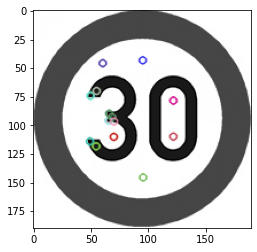

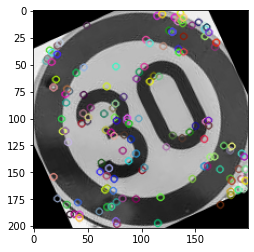

(23, 150)

In [49]:
# read images
img1 = cv2.imread('Verkehrsschilderkenner/30_ref.jpg')  
img2 = cv2.imread('Verkehrsschilderkenner/30_test_cut.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = rotate(img2, 25, False)
img2 = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

#sift
sift = cv2.SIFT_create()
#sift = cv2.ORB_create()


keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

img_3 = cv2.drawKeypoints(img1,keypoints_1,img1)
plt.imshow(img_3)
plt.show()
img_4 = cv2.drawKeypoints(img2,keypoints_2,img1)
plt.imshow(img_4)
plt.show()
len(keypoints_1), len(keypoints_2)

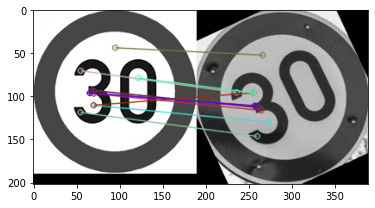

(<matplotlib.image.AxesImage at 0x296c43cd960>, None)

In [50]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches, img2, flags=2)
plt.imshow(img3),plt.show()

In [51]:
print(len(matches))

11
